In [2]:
#import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances
from sklearn import manifold
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
#Read Data
data = input_data.read_data_sets(".",one_hot = True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [4]:
len(data.train.labels)

55000

In [5]:
def plot_images(img):
    plt.imshow(img.reshape(28,28),cmap="binary")

In [6]:
print(np.shape(data.train.labels))
image1 = data.train.images[0, :]
label1 = data.train.labels[0, :]
print(np.shape(image1))

(55000, 10)
(784,)


In [7]:
#sample 10000 data points in 784-dimensional space from the train set
sample_images = np.zeros(shape=(10000, 784))
sample_labels = np.zeros(shape=(100000, 10))
count = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
index = 0
for i in range(0, 55000):
    image = data.train.images[i]
    label = data.train.labels[i]
    digit = np.nonzero(label)[0][0]
    if(count[digit] < 1000):
        count[digit] = count[digit] + 1
        sample_images[index] = image
        sample_labels[index] = label
        index = index + 1
print("sampling complete")
print(np.shape(sample_images))
# print(np.array_equal(sample_images[0], image1))
# print(np.array_equal(sample_labels[0], label1))
# print(sample_images[999])
# print(sample_labels[999])

sampling complete
(10000, 784)


In [8]:
#compute distance matrix of the sampled data points
dist_matrix = pairwise_distances(sample_images).astype(np.float32)
print("distance matrix computation complete")

distance matrix computation complete


In [9]:
pca = PCA(n_components=2)
init = pca.fit_transform(sample_images)

In [10]:
d = tf.placeholder(tf.float32, [10000, 10000])

w1 = tf.get_variable("w2",[10000, 2],initializer = tf.constant_initializer(init))

r_ = tf.reduce_sum(tf.square(w1), 1)
r = tf.reshape(r_, [-1, 1])
M = r - 2 * tf.matmul(w1, tf.transpose(w1)) + tf.transpose(r)
L = tf.reduce_sum(tf.square(tf.sqrt(M + 0.01) - d)) / 2 / 10000

In [11]:
#Define Optimizer
optim = tf.train.GradientDescentOptimizer(0.01).minimize(L)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

num_iter = 1000
loss_val = []
iteration = []
for i in range(num_iter):
    _, l = sess.run([optim, L],feed_dict = {d: dist_matrix})
    loss_val.append(l)
    iteration.append(i + 1)
    if i % 100 == 0: print(l)

224327.02
76472.18
72099.16
71162.39
70596.375
70205.414
69919.836
69700.95
69529.36
69391.37


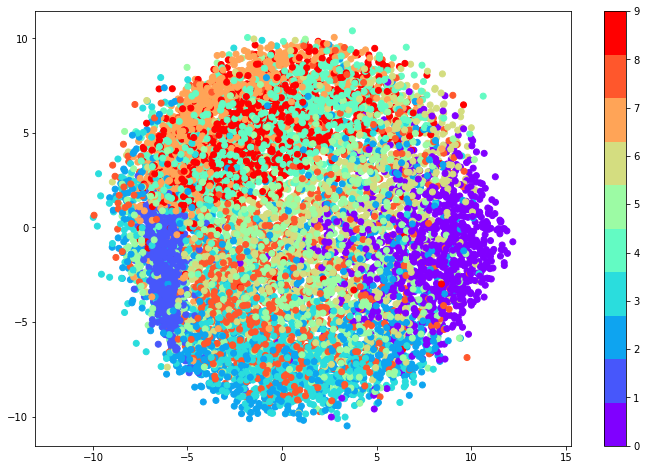

In [14]:
wx = sess.run([w1],feed_dict = {d: dist_matrix})
digits = np.array(np.nonzero(sample_labels[:]))

colorize = dict(c=digits[1][:], cmap=plt.cm.get_cmap('rainbow', 10))
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(wx[0][:, 0], wx[0][:, 1], **colorize)
plt.axis('equal')
plt.colorbar()